# F-test of Variance

# F-statistic or $F_{STAT}$ (for ANOVA) = $\frac{variance \, between \, groups}{variance \, within \, groups} $


## Assumptions of F-Test
### 1. The data within each category are normally distributed.
### 2. The population standard deviations of the variables under considerations are homoscedastic i.e. the population standard deviations are equal.
### 3. The various categories of the samples of the variable(s) under consideration are independent of one another. (Checked from sampling scheme.)

Now, let us go ahead and load the dataset on which we are going to perform Analysis of Variance.
Here, we are going to use one of the datasets which is loaded in Python. We will using the 'iris' dataset.

In [23]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let us check a few measures of descriptive statistics of the 'iris' dataset.

In [24]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Now, let us test the various assumptions of the F-Test and check whether we can apply the F-Test on this particular dataset. 
We we will create a dataframe from the above dataset and check the F-Test assumptions.

In [25]:
import pandas as pd

In [26]:
df = iris[['sepal_width','species']]
df.head()

,sepal_width,species
0,3.5,setosa
1,3.0,setosa
2,3.2,setosa
3,3.1,setosa
4,3.6,setosa


In [27]:
#Let us check the unique number of entries in the newly created dataframe.

df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Now we will use this dataset for further analysis.

# Check for Assumption 1

Let us check if the variables under consideration in the dataset are normally distributed.



Plot the histogram. We do have to remember that a symmetric histogram does not necessarily mean that the variables follow normal distribution

In [28]:
# We will be using the following code snippet while plotting the histogram.
#Let us check what the following code snippet gives us.

df.loc[df['species'] == 'setosa'].head()

,sepal_width,species
0,3.5,setosa
1,3.0,setosa
2,3.2,setosa
3,3.1,setosa
4,3.6,setosa


The above code snippet gives us a dataframe with only the 'setosa' values of the 'Species' variable.

Now, let us go ahead and plot the histogram.

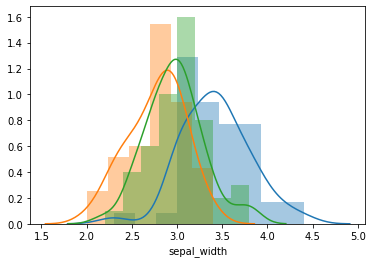

In [29]:
sns.distplot(df.loc[df['species'] == 'setosa']['sepal_width'])
sns.distplot(df.loc[df['species'] == 'versicolor']['sepal_width'])
sns.distplot(df.loc[df['species'] == 'virginica']['sepal_width'])

We can try to plot the histograms separately but we can see that we are not able to draw a lot of inferences from this act.

Let us go ahead and try the Shapiro test for the normality of  the data

The Hypothesis for the Shapiro Test are:
    
* $H_0$: $The \, samples\, are\, normally\, distributed.$
* $H_a$: $The \,samples \,are \,not \,normally \,distributed.$ 

In [30]:
from scipy.stats import shapiro

In [9]:
# The below code snippet helps us to get the names of the variables in the 'species' variable

names = iris.get('species') 


In [35]:
shapiro(df['sepal_width'][df['species']=="virginica"])

(0.9673910140991211, 0.1809043288230896)

In [31]:
for name in df['species'].unique(): # This code snippet loops through the entries of the variable 'species'
    print ("{}: {}".format(name,shapiro(df['sepal_width'][df['species'] == name])))

setosa: (0.97171950340271, 0.2715264856815338)
versicolor: (0.9741330742835999, 0.33798879384994507)
virginica: (0.9673910140991211, 0.1809043288230896)


Now, we see that for all the cases the corresponding p-values are greater than alpha (0.05). Thus, we $\textbf{Fail to Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$).

# Check for Assumption 2

Now we will perform the $\textbf{Levene's}$ test.

In [36]:
unique = names.unique()
unique

array(['setosa', 'versicolor', 'virginica'], dtype=object)

The Hypothesis for the Levene's Test are:
    
* $H_0$: $The\, homogenity \,of \,variance \,across\, groups\,.$
* $H_a$: $There\, is \,no \,homogenity \,of \,variance \,across\, groups\,.$


In [37]:
from scipy.stats import levene

In [20]:
levene(df['sepal_width'][df['species'] == unique[0]], 
               df['sepal_width'][df['species'] == unique[1]], 
               df['sepal_width'][df['species'] == unique[2]])

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

Now, we see that the corresponding p-value is greater than alpha (0.05). Thus, we $\textbf{Accept}$ accept the $\textbf{Null Hypothesis}$ ($H_0$).

# All the assumptions have been tested and we see that the particular variables in question do meet all the assumptions of the F-Test. 
# So, now let us go ahead and perform the one-way F-Test.
###### Note: F-Tests are always one way or one sided since we cannot have the value of the ratio of variances negative.

In [38]:
import scipy.stats as stats

In [22]:
stats.f_oneway(df['sepal_width'][df['species'] == unique[0]], 
               df['sepal_width'][df['species'] == unique[1]], 
               df['sepal_width'][df['species'] == unique[2]])


F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

Our F-statistic of 49.16 suggests the between-groups variance is 49.16 times the within-group variance.

##### Note: The significance of the P-value will be explained in much detail while performing the ANOVA technique.